In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

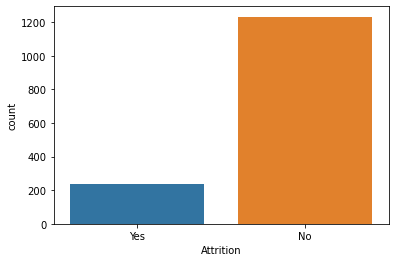

In [7]:
sns.countplot(
    df['Attrition'],
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None
)

In [8]:
df.drop(['EmployeeCount', 'EmployeeNumber'], axis=1, inplace=True)

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [10]:
att_dummy = pd.get_dummies(df['Attrition'])
att_dummy.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [11]:
df = pd.concat([df, att_dummy], axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,1,6,3,3,2,2,2,2,1,0


In [12]:
df.drop(['Attrition', 'No'], axis=1, inplace=True)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,80,1,6,3,3,2,2,2,2,0


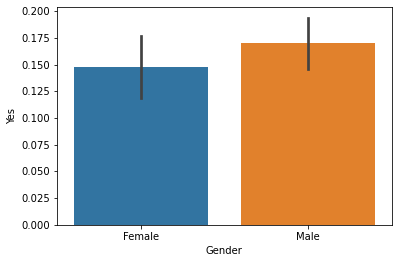

In [13]:
sns.barplot(
    x=df['Gender'],
    y=df['Yes'],

)

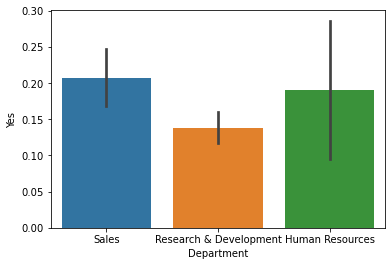

In [14]:
sns.barplot(
    x=df['Department'],
    y=df['Yes'],

)

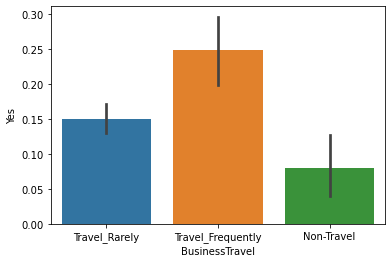

In [15]:
sns.barplot(
    x=df['BusinessTravel'],
    y=df['Yes'],

)

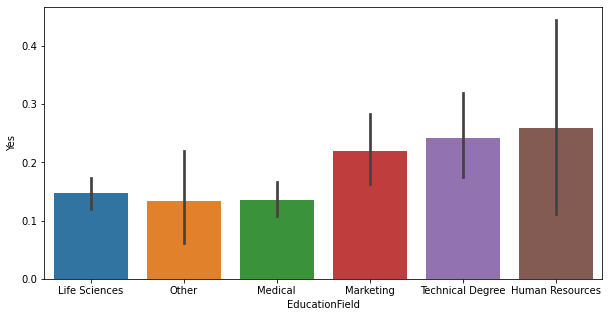

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=df['EducationField'],
    y=df['Yes'],

)

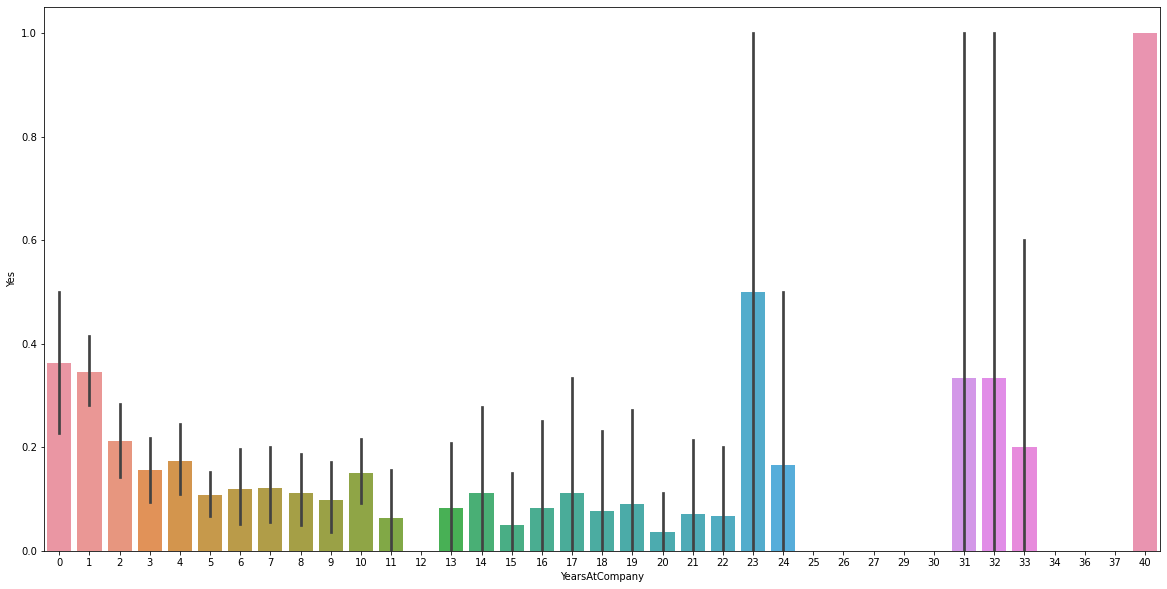

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(
    x=df['YearsAtCompany'],
    y=df['Yes'],

)

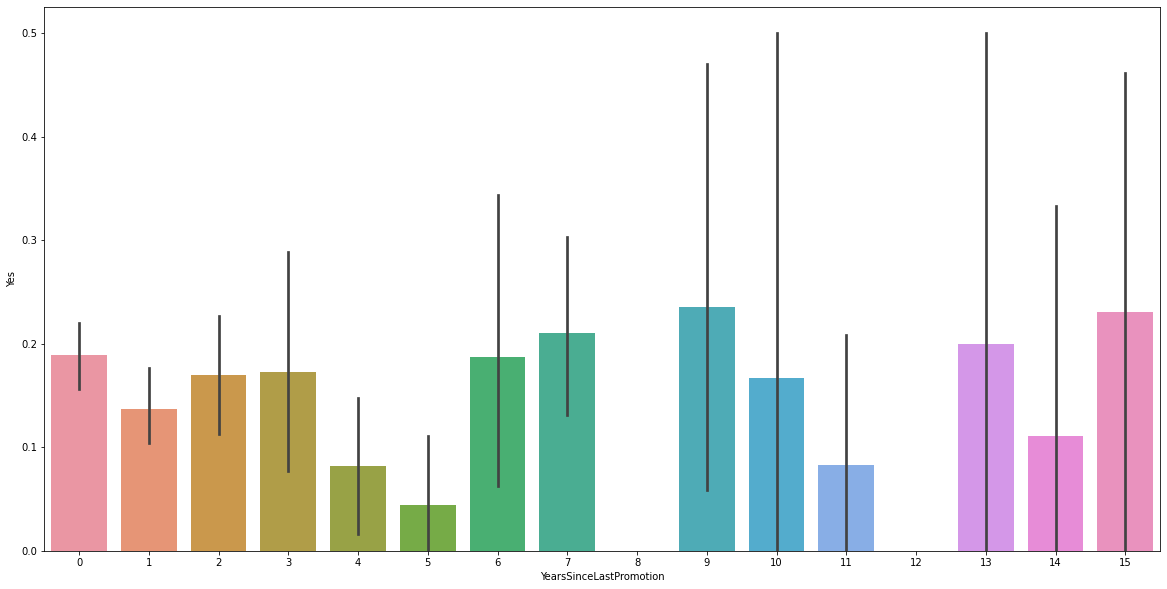

In [18]:
plt.figure(figsize=(20,10))
sns.barplot(
    x=df['YearsSinceLastPromotion'],
    y=df['Yes'],

)

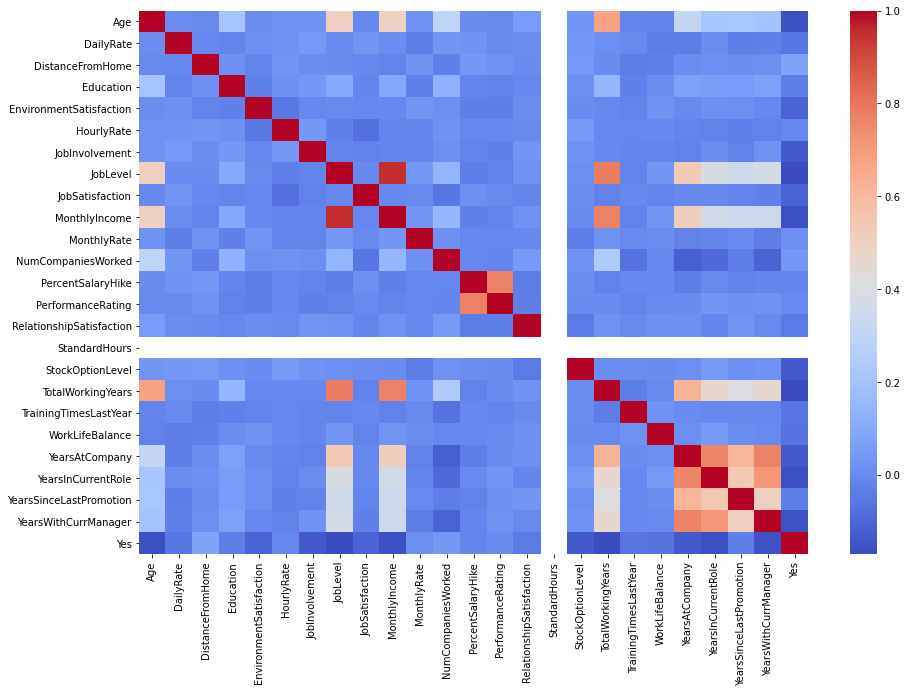

In [19]:
plt.figure(figsize=(15,10))

sns.heatmap(
    df.corr(),
    cmap='coolwarm'
)

In [20]:
df = df.drop(['Age', 'JobLevel'], axis=1)

In [21]:
df.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,...,80,0,8,0,1,6,4,0,5,1
1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,...,80,1,10,3,3,10,7,1,7,0
2,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,...,80,0,7,3,3,0,0,0,0,1
3,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,...,80,0,8,3,3,8,7,3,0,0
4,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,...,80,1,6,3,3,2,2,2,2,0


In [22]:
for col in df.columns:
    if df[col].dtype != np.number:
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        continue

In [23]:
df

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,2,624,2,0,1,1,1,0,64,2,...,0,0,8,0,0,6,4,0,5,1
1,1,113,1,7,0,1,2,1,31,1,...,0,1,10,3,2,10,7,1,7,0
2,2,805,1,1,1,4,3,1,62,1,...,0,0,7,3,2,0,0,0,0,1
3,1,820,1,2,3,1,3,0,26,2,...,0,0,8,3,2,8,7,3,0,0
4,2,312,1,1,0,3,0,1,10,2,...,0,1,6,3,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,494,1,22,1,3,2,1,11,3,...,0,1,17,3,2,5,2,0,3,0
1466,2,327,1,5,0,3,3,1,12,1,...,0,1,9,5,2,7,7,1,7,0
1467,2,39,1,3,2,1,1,1,57,3,...,0,1,6,0,2,6,2,0,3,0
1468,1,579,2,1,2,3,3,1,33,1,...,0,0,17,3,1,9,6,0,8,0


In [24]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [25]:
X.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,624,2,0,1,1,1,0,64,2,...,0,0,0,8,0,0,6,4,0,5
1,1,113,1,7,0,1,2,1,31,1,...,3,0,1,10,3,2,10,7,1,7
2,2,805,1,1,1,4,3,1,62,1,...,1,0,0,7,3,2,0,0,0,0
3,1,820,1,2,3,1,3,0,26,2,...,2,0,0,8,3,2,8,7,3,0
4,2,312,1,1,0,3,0,1,10,2,...,3,0,1,6,3,2,2,2,2,2


In [26]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Yes, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [28]:
lr = LogisticRegression()

In [29]:
lr.fit(X_train, y_train)

LogisticRegression()

In [30]:
pred = lr.predict(X_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]


In [31]:
print('Acuuracy is: ' ,accuracy_score(y_test, pred))

Acuuracy is:  0.854875283446712


In [32]:
print(confusion_matrix(y_test, pred))

[[369  11]
 [ 53   8]]


In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.42      0.13      0.20        61

    accuracy                           0.85       441
   macro avg       0.65      0.55      0.56       441
weighted avg       0.81      0.85      0.82       441



In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predmnb = mnb.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, predmnb))
print(confusion_matrix(y_test, predmnb))
print(classification_report(y_test, predmnb))

Accuracy score:  0.6213151927437641
[[244 136]
 [ 31  30]]
              precision    recall  f1-score   support

           0       0.89      0.64      0.75       380
           1       0.18      0.49      0.26        61

    accuracy                           0.62       441
   macro avg       0.53      0.57      0.50       441
weighted avg       0.79      0.62      0.68       441



In [36]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc.score(X_train, y_train)
predsvc = svc.predict(X_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8616780045351474
[[380   0]
 [ 61   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



In [37]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)
preddtc = dtc.predict(X_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.7981859410430839
[[335  45]
 [ 44  17]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       380
           1       0.27      0.28      0.28        61

    accuracy                           0.80       441
   macro avg       0.58      0.58      0.58       441
weighted avg       0.80      0.80      0.80       441



In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train)
predknn = knn.predict(X_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.8321995464852607
[[360  20]
 [ 54   7]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       380
           1       0.26      0.11      0.16        61

    accuracy                           0.83       441
   macro avg       0.56      0.53      0.53       441
weighted avg       0.79      0.83      0.80       441



In [39]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
svc.score(X_train, y_train)
predsvc = svc.predict(X_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8616780045351474
[[380   0]
 [ 61   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



In [40]:
rf = RandomForestClassifier(n_estimators= 10, criterion='entropy', random_state=42)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)
predrf = rf.predict(X_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.854875283446712
[[374   6]
 [ 58   3]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       380
           1       0.33      0.05      0.09        61

    accuracy                           0.85       441
   macro avg       0.60      0.52      0.50       441
weighted avg       0.79      0.85      0.81       441



In [41]:
import pickle
filename = 'hr_attrition_project.pkl'
pickle.dump(svc, open(filename, 'wb'))